<a href="https://colab.research.google.com/github/dankook-sw/DataMining/blob/main/project/HW_MNIST_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MNIST 학습 실험

수업 시간에 배웠던 손글씨 이미지 분류를 학습하는 실험입니다.

실험의 목적은 하이퍼파라미터를 변경해 테스트 데이터에 대해 최대 정확도를 도출하는 것입니다.

수정할 수 있는 부분은 다음과 같고 나머지 코드 부분은 수정이 불가합니다.
1. 파일 경로
2. 하이퍼 파라미터   
*   iters_num
*   batch_size
*   learning_rate
*   hidden_size

3. accuracy 중간 확인 간격 (if i % 20 == 0:) 의 20. 중간 확인 간격이 짧으면 시간이 오래 걸릴 수 있으므로 조절하여도 됩니다.


제출할 것
1. 본인이 도출한 최대 정확도. jupyter notebook에 수행 결과가 출력된 대로 그대로 제출. (학번.ipynb)
2. 학습 loss 그래프. train_loss_list를 이용해 iteration이 증가함에 따라 loss가 감소하는 양상을 matplotlib을 이용해 그래프로 그려 제출. (코드는 jupyter notebook에 남겨두고, 그래프 캡처하여 pdf 파일에 붙여넣기)
3. 최대 정확도를 도출하기까지 하이퍼파라미터를 어떻게 변경해 보았고 그에 따른 결과가 어땠는지에 대한 분석을 반페이지 분량으로 작성하여 제출. (pdf 파일)

In [ ]:
#### 본인의 디렉터리 경로에 맞게 수정 가능 ######
from google.colab import drive
drive.mount('/content/gdrive/')
#################################################

Mounted at /content/gdrive/


In [ ]:
#### 본인의 디렉터리 경로에 맞게 수정 가능 ######
import sys
import os
import numpy as np
sys.path.append('/content/gdrive/MyDrive/study/빅데이터마이닝 실습/MNIST')  # 구글 드라이브 디렉터리의 파일을 가져올 수 있도록 설정
from common.functions import sigmoid, softmax, cross_entropy_error
from common.gradient import numerical_gradient
from keras.datasets import mnist
#################################################

# prior code _ invalid !

In [ ]:
#################### 수정 불가 ###################
class TwoLayerNet:

    # 초기화를 수행한다.
    def __init__(self, input_size, hidden_size, output_size,
                 weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * \
            np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * \
            np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    # 예측(추론)을 수행한다.
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y

    # 손실 함수의 값을 구한다.
    # x : 입력데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)

        return cross_entropy_error(y, t)

    # 정확도를 구한다.
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # 가중치 매개변수의 기울기를 구한다.
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads
#################################################

In [ ]:
if __name__ == '__main__':

  ######### 데이터 로드 부분 수정 불가 ###########
  (x_train, t_train), (x_test, t_test) = mnist.load_data()
  num_train_data = 10000
  num_test_data = 1000
  x_train = x_train[0:num_train_data]
  t_train = t_train[0:num_train_data]
  x_test = x_train[0:num_test_data]
  t_test = t_train[0:num_test_data]
  x_train = x_train.reshape(num_train_data, 784)
  x_test = x_test.reshape(num_test_data, 784)
  t_train = np.eye(10)[t_train]
  t_test = np.eye(10)[t_test]
  #################################################

  ###### [수정할 부분] 하이퍼파라미터 설정#########
  iters_num = 150
  batch_size = 64
  learning_rate = 0.03
  hidden_size = 50

  #MNIST는 10개 구분하는거고 hidden은 그 특징을 잡는거니 이미 어느 정도가 적절한지 나와있지 않을까 -> 50~100
  # iternum * batchsize가 일정하면 연산 횟수에 큰 차이가 없을 것임을 고려. 160 iter에 32 batch가 max랬음. hidden부터 특정하면 쉬울듯 -> hidden은 제곱으로 증가한다고 한다
  #learning rate는 iter랑 관련 있으니 총 이동이 적어도 2에서 4까진 가야 하지 않을까 싶음
  # loss는 계속 줄고 acc는 그대로 -> 수렴(ovft가 아니라면) => 충분한 iter, 아니라면 iter를 높이는 선택을 해보자
  # 배치 사이즈가 커지면 학습률이 커져도 안정적 2~4

  # 100, 32, 0.05, 50 : 0.694, 0.634(?:0.644)         abt 36 sec, non-ovft
  # 100, 32, 0.02, 75 : 97 종료(80:0.721)             abt 67 sec
  # 150, 64, 0.03, 50 : 0.82    -> 100에서 0.69 정도인거보면 iter가 중요한듯                          abt  sec

  #################################################


  ########### 학습 수행 부분 수정 불가 ############
  # accuracy 중간 확인 간격은 수정 가능 (if i % 20 == 0:)

  network = TwoLayerNet(input_size=784, hidden_size=hidden_size, output_size=10)

  train_loss_list = []
  train_acc_list = []
  test_acc_list = []

  # 1에폭당 반복 수
  train_size = x_train.shape[0]
  iter_per_epoch = max(train_size / batch_size, 1)

  for i in range(iters_num):
      # 미니배치 획득
      batch_mask = np.random.choice(train_size, batch_size)
      x_batch = x_train[batch_mask]
      t_batch = t_train[batch_mask]

      # 기울기 계산
      grad = network.numerical_gradient(x_batch, t_batch)

      # 매개변수 갱신
      for key in ('W1', 'b1', 'W2', 'b2'):
          network.params[key] -= learning_rate * grad[key]

      # 학습 loss 기록
      loss = network.loss(x_batch, t_batch)
      train_loss_list.append(loss)

      # 테스트 loss 기록
      print("iteration: ", i, "     train loss ", loss)

      # 정확도 계산
      if i % 20 == 0:
          train_acc = network.accuracy(x_train, t_train)
          test_acc = network.accuracy(x_test, t_test)
          train_acc_list.append(train_acc)
          test_acc_list.append(test_acc)
          print("train acc, test acc | "
                + str(train_acc) + ", " + str(test_acc))
  #################################################

########## 최종 결과 출력 부분 수정 불가 ########
test_acc = network.accuracy(x_test, t_test)
print("final test accuracy: ", test_acc)
#################################################

iteration:  0      train loss  2.2759028092605296
train acc, test acc | 0.1563, 0.14
iteration:  1      train loss  2.2586008768884316
iteration:  2      train loss  2.259059311008383
iteration:  3      train loss  2.2533477493353904
iteration:  4      train loss  2.2520290023018674
iteration:  5      train loss  2.2404040872693356
iteration:  6      train loss  2.2342318818518057
iteration:  7      train loss  2.2113176597868023
iteration:  8      train loss  2.23206684012362
iteration:  9      train loss  2.212250833925051
iteration:  10      train loss  2.1955855932214385
iteration:  11      train loss  2.146400671337333
iteration:  12      train loss  2.1896404918937726
iteration:  13      train loss  2.1564982259164465
iteration:  14      train loss  2.1656927316524355
iteration:  15      train loss  2.13452946740579
iteration:  16      train loss  2.126848014931996
iteration:  17      train loss  2.0694309160952624
iteration:  18      train loss  2.0967409400887225
iteration:  19

# new code

In [ ]:
#################### 수정 불가 ###################
class TwoLayerNet:

    # 초기화를 수행한다.
    def __init__(self, input_size, hidden_size, output_size,
                 weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * \
            np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * \
            np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    # 예측(추론)을 수행한다.
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y

    # 손실 함수의 값을 구한다.
    # x : 입력데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)

        return cross_entropy_error(y, t)

    # 정확도를 구한다.
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # 가중치 매개변수의 기울기를 구한다.
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads
#################################################

In [ ]:
if __name__ == '__main__':

  ######### 데이터 로드 부분 수정 불가 ###########
  (x_train, t_train), (x_test, t_test) = mnist.load_data()
  num_train_data = 10000
  num_test_data = 1000
  x_train = x_train[0:num_train_data]
  t_train = t_train[0:num_train_data]
  x_test = x_test[0:num_test_data]
  t_test = t_test[0:num_test_data]
  x_train = x_train.reshape(num_train_data, 784)
  x_test = x_test.reshape(num_test_data, 784)
  t_train = np.eye(10)[t_train]
  t_test = np.eye(10)[t_test]
  #################################################

  ###### [수정할 부분] 하이퍼파라미터 설정#########
  iters_num = 320
  batch_size = 63
  learning_rate = 0.02
  hidden_size = 75

  # 100, 32, 0.05, 50 : 0.694, 0.634(?:0.644)
  # 100, 32, 0.02, 75 : 97 종료(80:0.721)
  # 150, 64, 0.03, 50 : 0.820
  ############# new code ##################
  # 160, 64, 0.03, 75 : 0.816, 0.792(120: 0.823)
  # 320, 64, 0.02, 75 : 0.864
  # 1000, 32, 0.02 50 : 0.843
  # 600 32 0.03 60 : 0.838

  #################################################


  ########### 학습 수행 부분 수정 불가 ############
  # accuracy 중간 확인 간격은 수정 가능 (if i % 20 == 0:)

  network = TwoLayerNet(input_size=784, hidden_size=hidden_size, output_size=10)

  train_loss_list = []
  train_acc_list = []
  test_acc_list = []

  # 1에폭당 반복 수
  train_size = x_train.shape[0]
  iter_per_epoch = max(train_size / batch_size, 1)

  for i in range(iters_num):
      # 미니배치 획득
      batch_mask = np.random.choice(train_size, batch_size)
      x_batch = x_train[batch_mask]
      t_batch = t_train[batch_mask]

      # 기울기 계산
      grad = network.numerical_gradient(x_batch, t_batch)

      # 매개변수 갱신
      for key in ('W1', 'b1', 'W2', 'b2'):
          network.params[key] -= learning_rate * grad[key]

      # 학습 loss 기록
      loss = network.loss(x_batch, t_batch)
      train_loss_list.append(loss)

      # 테스트 loss 기록
      print("iteration: ", i, "     train loss ", loss)

      # 정확도 계산
      if i % 20 == 0:
          train_acc = network.accuracy(x_train, t_train)
          test_acc = network.accuracy(x_test, t_test)
          train_acc_list.append(train_acc)
          test_acc_list.append(test_acc)
          print("train acc, test acc | "
                + str(train_acc) + ", " + str(test_acc))
  #################################################

########## 최종 결과 출력 부분 수정 불가 ########
test_acc = network.accuracy(x_test, t_test)
print("final test accuracy: ", test_acc)
#################################################


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
iteration:  0      train loss  2.2460744656668794
train acc, test acc | 0.1489, 0.125
iteration:  1      train loss  2.2333418037985924
iteration:  2      train loss  2.2021999567867008
iteration:  3      train loss  2.2280381282255073
iteration:  4      train loss  2.19650214153027
iteration:  5      train loss  2.2213799121063476
iteration:  6      train loss  2.195532147306117
iteration:  7      train loss  2.1695853536501923
iteration:  8      train loss  2.1976338482392332
iteration:  9      train loss  2.1764294441583356
iteration:  10      train loss  2.171235007491637
iteration:  11      train loss  2.172156811842826
iteration:  12      train loss  2.1503793876630777
iteration:  13      train loss  2.165475864857183
iteration:  14      train loss  2.055913176867093
iteration:  15      train loss  2.086441758243585
iteration:  16      train loss  2.120390620385431
iteration:  17      train loss  2.0826897707307825
iteration:  18

/content/gdrive/MyDrive/study/빅데이터마이닝 실습/MNIST/common/functions.py:14: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


train acc, test acc | 0.8233, 0.798
iteration:  261      train loss  0.8974610206616307
iteration:  262      train loss  0.7471233168646878
iteration:  263      train loss  0.7464783462567132
iteration:  264      train loss  0.7701256357971354
iteration:  265      train loss  0.8633089229341914
iteration:  266      train loss  0.7513414792781408
iteration:  267      train loss  0.948588394202337
iteration:  268      train loss  0.9348816996920616
iteration:  269      train loss  0.889932157369492
iteration:  270      train loss  1.1126089561334833
iteration:  271      train loss  0.7291398715351216
iteration:  272      train loss  0.9844562833158144
iteration:  273      train loss  0.7228215053285415
iteration:  274      train loss  0.6863440990239033
iteration:  275      train loss  0.9313550262922038
iteration:  276      train loss  0.7599019005610568
iteration:  277      train loss  1.0134006104022304
iteration:  278      train loss  0.8666715795771177
iteration:  279      train los

# 12시간 트릭

In [ ]:
var startClickConnect = function startClickConnect(){
    var clickConnect = function clickConnect(){
        console.log("Connnect Clicked - Start");
        document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click();
        console.log("Connnect Clicked - End");
    };

    var intervalId = setInterval(clickConnect, 60000);

    var stopClickConnectHandler = function stopClickConnect() {
        console.log("Connnect Clicked Stopped - Start");
        clearInterval(intervalId);
        console.log("Connnect Clicked Stopped - End");
    };

    return stopClickConnectHandler;
};

var stopClickConnect = startClickConnect();

100% random initilalizing -> require higher learning rate?

Downloading data from https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
iteration:  0      train loss  2.2757196427239847
train acc, test acc | 0.1216, 0.121
iteration:  1      train loss  2.2755615064107335
iteration:  2      train loss  2.269617555990612
iteration:  3      train loss  2.261735790179938
iteration:  4      train loss  2.241977641883228
iteration:  5      train loss  2.2160861863196235
iteration:  6      train loss  2.247229754771218
iteration:  7      train loss  2.220242572795523
iteration:  8      train loss  2.193111701301242
iteration:  9      train loss  2.2076809174519116
iteration:  10      train loss  2.1951742390888977
iteration:  11      train loss  2.2007404826853034
iteration:  12      train loss  2.196238273192745
iteration:  13      train loss  2.1724359726786777
iteration:  14      train loss  2.172826851514091
iteration:  15      train loss  2.1560823609983797
iteration:  16      train loss  2.136649099596163
iteration:  17      train loss  2.088942237621437
iteration:  18      train loss  2.1041834263416677
iteration:  19      train loss  2.085332424446861
iteration:  20      train loss  2.064853420772079
train acc, test acc | 0.4676, 0.45
iteration:  21      train loss  2.1033520902451053
iteration:  22      train loss  2.0341298551487013
iteration:  23      train loss  2.0234749691134786
iteration:  24      train loss  2.0050352693973075
iteration:  25      train loss  2.01698543667083
iteration:  26      train loss  2.017674551738947
iteration:  27      train loss  2.042288821432696
iteration:  28      train loss  2.0115547802929603
iteration:  29      train loss  1.9768840203823852
iteration:  30      train loss  2.012217717417919
iteration:  31      train loss  2.0158282354063406
iteration:  32      train loss  1.899941993688651
iteration:  33      train loss  1.8946573951519654
iteration:  34      train loss  1.9658358935390299
iteration:  35      train loss  1.917353664997329
iteration:  36      train loss  1.8834438108077038
iteration:  37      train loss  1.9007400378532795
iteration:  38      train loss  1.8842819879045642
iteration:  39      train loss  1.9243680916367325
iteration:  40      train loss  1.781963984607181
train acc, test acc | 0.5792, 0.543
iteration:  41      train loss  1.846084448109182
iteration:  42      train loss  1.8413576428940057
iteration:  43      train loss  1.9148178422113173
iteration:  44      train loss  1.8260014264645164
iteration:  45      train loss  1.7812006172328894
iteration:  46      train loss  1.7615162089754048
iteration:  47      train loss  1.8178286553035576
iteration:  48      train loss  1.809519949764192
iteration:  49      train loss  1.7687276426336447
iteration:  50      train loss  1.718020052122939
iteration:  51      train loss  1.766610032866318
iteration:  52      train loss  1.7491297283711478
iteration:  53      train loss  1.7447698103606815
iteration:  54      train loss  1.6985530089990264
iteration:  55      train loss  1.781269950221425
iteration:  56      train loss  1.6688172753134092
iteration:  57      train loss  1.7092849058420625
iteration:  58      train loss  1.6972474596478557
iteration:  59      train loss  1.636334730384004
iteration:  60      train loss  1.698803226863667
train acc, test acc | 0.6723, 0.637
iteration:  61      train loss  1.659144613388307
iteration:  62      train loss  1.708956351449578
iteration:  63      train loss  1.6207091927988504
iteration:  64      train loss  1.7180768629795906
iteration:  65      train loss  1.5569125663049501
iteration:  66      train loss  1.576992025578895
iteration:  67      train loss  1.6465352600250838
iteration:  68      train loss  1.6696997454932658
iteration:  69      train loss  1.5887289902935637
iteration:  70      train loss  1.639962635979864
iteration:  71      train loss  1.6034175260280712
iteration:  72      train loss  1.6222503380323423
iteration:  73      train loss  1.5165968359523738
iteration:  74      train loss  1.5391802734792375
iteration:  75      train loss  1.5416146608672299
iteration:  76      train loss  1.4729018192238343
iteration:  77      train loss  1.488843147383257
iteration:  78      train loss  1.5087115806001272
iteration:  79      train loss  1.4971260795520067
iteration:  80      train loss  1.414517132389682
train acc, test acc | 0.7164, 0.682
iteration:  81      train loss  1.4020899720646143
iteration:  82      train loss  1.449307049713358
iteration:  83      train loss  1.5238594409819661
iteration:  84      train loss  1.3993039719453642
iteration:  85      train loss  1.3083553965491301
iteration:  86      train loss  1.4132329362216547
iteration:  87      train loss  1.4579998721041612
iteration:  88      train loss  1.4301473291676876
iteration:  89      train loss  1.4085616160360506
iteration:  90      train loss  1.4886316408519333
iteration:  91      train loss  1.3679080256934393
iteration:  92      train loss  1.3655854855561251
iteration:  93      train loss  1.3086345200821792
iteration:  94      train loss  1.2632601936843493
iteration:  95      train loss  1.3801816244219798
iteration:  96      train loss  1.3371862863855237
iteration:  97      train loss  1.3328839905484493
iteration:  98      train loss  1.3828094336064802
iteration:  99      train loss  1.2859055466149432
iteration:  100      train loss  1.2973626449643174
train acc, test acc | 0.7658, 0.721
iteration:  101      train loss  1.2169317951009142
iteration:  102      train loss  1.3149430897530592
iteration:  103      train loss  1.2757961443796815
iteration:  104      train loss  1.3488262131401765
iteration:  105      train loss  1.2457486958439108
iteration:  106      train loss  1.244048903365258
iteration:  107      train loss  1.250786063032796
iteration:  108      train loss  1.2279012368331406
iteration:  109      train loss  1.2939772229112343
iteration:  110      train loss  1.2666214548204815
iteration:  111      train loss  1.1345364575176506
iteration:  112      train loss  1.1621748094796231
iteration:  113      train loss  1.2771564112673017
iteration:  114      train loss  1.2024482364357425
iteration:  115      train loss  1.2278451084710023
iteration:  116      train loss  1.1366005177217415
iteration:  117      train loss  1.2788469411352068
iteration:  118      train loss  1.1988700464497772
iteration:  119      train loss  1.3018969723912601
iteration:  120      train loss  1.2423954226893164
train acc, test acc | 0.7905, 0.76
iteration:  121      train loss  1.156222352896925
iteration:  122      train loss  1.090229502705875
iteration:  123      train loss  1.035207453470458
iteration:  124      train loss  1.0775619042481053
iteration:  125      train loss  1.155923011324235
iteration:  126      train loss  1.1626759834029854
iteration:  127      train loss  1.098769771321948
iteration:  128      train loss  1.0918496946694654
iteration:  129      train loss  1.1550758102400103
iteration:  130      train loss  1.1793164859166285
iteration:  131      train loss  1.147801362501176
iteration:  132      train loss  1.1231304619979572
iteration:  133      train loss  1.0906667849967793
iteration:  134      train loss  1.0284742350135092
iteration:  135      train loss  1.0485139047018184
iteration:  136      train loss  1.2044619284005844
iteration:  137      train loss  0.9513177789837741
iteration:  138      train loss  1.0692515313014428
iteration:  139      train loss  1.186436421809468
iteration:  140      train loss  1.034885585825279
train acc, test acc | 0.8247, 0.796
iteration:  141      train loss  1.1167493660356096
iteration:  142      train loss  0.9564907064143754
iteration:  143      train loss  1.1333363633044014
iteration:  144      train loss  1.0499209186068592
iteration:  145      train loss  1.0391118609278203
iteration:  146      train loss  1.1061043840816884
iteration:  147      train loss  0.9582811773712565
iteration:  148      train loss  1.004964611519823
iteration:  149      train loss  0.9579557051269638
iteration:  150      train loss  0.9723245395595749
iteration:  151      train loss  0.9134525889958347
iteration:  152      train loss  1.001301305942195
iteration:  153      train loss  1.0169018644392565
iteration:  154      train loss  1.0322616432544098
iteration:  155      train loss  1.1366301265221899
iteration:  156      train loss  0.8945154940327992
iteration:  157      train loss  1.0259959457401067
iteration:  158      train loss  0.9647519418153093
iteration:  159      train loss  0.9871815941241578
iteration:  160      train loss  1.015756929871951
train acc, test acc | 0.8255, 0.802
iteration:  161      train loss  0.9044821101796061
iteration:  162      train loss  1.043410952604967
iteration:  163      train loss  1.0061991796283842
iteration:  164      train loss  1.1105293149282975
iteration:  165      train loss  0.9847395042323837
iteration:  166      train loss  0.9168291903630237
iteration:  167      train loss  0.8513181776368693
iteration:  168      train loss  0.9575861225312947
iteration:  169      train loss  0.8869405764888112
iteration:  170      train loss  0.9855660802507021
iteration:  171      train loss  1.0129387356191684
iteration:  172      train loss  0.9067949130356935
iteration:  173      train loss  1.0062881579564866
iteration:  174      train loss  0.9050927485671321
iteration:  175      train loss  0.8289896639660965
iteration:  176      train loss  0.9122415339477918
iteration:  177      train loss  0.9629682188119941
iteration:  178      train loss  0.9114790043636459
iteration:  179      train loss  0.9292809698257645
iteration:  180      train loss  0.897148782811124
train acc, test acc | 0.8409, 0.806
iteration:  181      train loss  0.8415458930768291
iteration:  182      train loss  0.8744077981796814
iteration:  183      train loss  0.8226662913614029
iteration:  184      train loss  0.9668046213649222
iteration:  185      train loss  0.9218898351733787
iteration:  186      train loss  0.7901827925776008
iteration:  187      train loss  0.7737928849140618
iteration:  188      train loss  0.8523562468634581
iteration:  189      train loss  0.8124210366793625
iteration:  190      train loss  0.9033816104610264
iteration:  191      train loss  1.0533905868329496
iteration:  192      train loss  0.844278069823628
iteration:  193      train loss  0.8648238341098071
iteration:  194      train loss  1.0681850161574287
iteration:  195      train loss  0.8992949333574063
iteration:  196      train loss  0.8925979138788089
iteration:  197      train loss  0.8170372195110439
iteration:  198      train loss  0.871200652073364
iteration:  199      train loss  0.9231424470071918
iteration:  200      train loss  0.8275417777939357
train acc, test acc | 0.8709, 0.845
iteration:  201      train loss  0.8048728499827881
iteration:  202      train loss  0.8499311927873667
iteration:  203      train loss  0.8447988999150843
iteration:  204      train loss  0.7067919980727154
iteration:  205      train loss  0.8495401940419313
iteration:  206      train loss  0.8770739873139631
iteration:  207      train loss  0.8305319094333568
iteration:  208      train loss  1.0425780724233493
iteration:  209      train loss  0.8378472193154043
iteration:  210      train loss  0.7766940027958271
iteration:  211      train loss  0.8525503650149391
iteration:  212      train loss  0.7740369358900995
iteration:  213      train loss  0.6578986434873398
iteration:  214      train loss  0.7257268643502126
iteration:  215      train loss  0.8133176488101952
iteration:  216      train loss  0.8521073437344059
iteration:  217      train loss  0.6557820771493944
iteration:  218      train loss  0.7621614920553001
iteration:  219      train loss  0.8534852657813158
iteration:  220      train loss  0.8103308774572412
train acc, test acc | 0.8774, 0.84
iteration:  221      train loss  0.7876820539522712
iteration:  222      train loss  0.7641102042484408
iteration:  223      train loss  0.8031380702546578
iteration:  224      train loss  0.7224402503060756
iteration:  225      train loss  0.7884112889485935
iteration:  226      train loss  0.8323677635343124
iteration:  227      train loss  0.7408212491715884
iteration:  228      train loss  0.7068707034502555
iteration:  229      train loss  0.6900578077097138
iteration:  230      train loss  0.835484595182851
iteration:  231      train loss  0.6882609934625245
iteration:  232      train loss  0.8601319562313416
iteration:  233      train loss  0.6928226936082473
iteration:  234      train loss  0.783987266334281
iteration:  235      train loss  0.7565831041094826
iteration:  236      train loss  0.7521878013365129
iteration:  237      train loss  0.8309146572222391
iteration:  238      train loss  0.7236903513698753
iteration:  239      train loss  0.644419314237463
iteration:  240      train loss  0.7604603158309728
train acc, test acc | 0.8819, 0.852
iteration:  241      train loss  0.7330016005383924
iteration:  242      train loss  0.6640894517335202
iteration:  243      train loss  0.6789824264882254
iteration:  244      train loss  0.7605062377550881
iteration:  245      train loss  0.7111445474589124
iteration:  246      train loss  0.6488423039314909
iteration:  247      train loss  0.6930542541108278
iteration:  248      train loss  0.7939209677929131
iteration:  249      train loss  0.7286169245549305
iteration:  250      train loss  0.7731207774579851
iteration:  251      train loss  0.7599737814407872
iteration:  252      train loss  0.6225706019957177
iteration:  253      train loss  0.6275745743381034
iteration:  254      train loss  0.6521409326545096
iteration:  255      train loss  0.81607640468494
iteration:  256      train loss  0.7079306384974258
iteration:  257      train loss  0.7449217836659338
iteration:  258      train loss  0.7233772612389722
iteration:  259      train loss  0.8107433374543562
iteration:  260      train loss  0.7106903542518503
train acc, test acc | 0.8904, 0.868
iteration:  261      train loss  0.637915708087041
iteration:  262      train loss  0.7017243293762293
iteration:  263      train loss  0.6973771529128368
iteration:  264      train loss  0.5733064203135122
iteration:  265      train loss  0.6625589784621864
iteration:  266      train loss  0.5691514855591819
iteration:  267      train loss  0.6524178546822293
iteration:  268      train loss  0.5885565210796452
iteration:  269      train loss  0.7558210603985298
iteration:  270      train loss  0.6173373086083435
iteration:  271      train loss  0.5808460798853259
iteration:  272      train loss  0.6181358582517897
iteration:  273      train loss  0.6168288317147015
iteration:  274      train loss  0.6323020527847372
iteration:  275      train loss  0.6977157004929859
iteration:  276      train loss  0.7566582856865769
iteration:  277      train loss  0.6413754536021485
iteration:  278      train loss  0.6052669018116028
iteration:  279      train loss  0.6960630753226742
iteration:  280      train loss  0.5987981033098915
train acc, test acc | 0.8874, 0.86
iteration:  281      train loss  0.6368823570917871
iteration:  282      train loss  0.6608851344311228
iteration:  283      train loss  0.6137788863862048
iteration:  284      train loss  0.5350560898669348
iteration:  285      train loss  0.6937476143789166
iteration:  286      train loss  0.7971131775572042
iteration:  287      train loss  0.5515964299919014
iteration:  288      train loss  0.5759257244171959
iteration:  289      train loss  0.6080687476949669
iteration:  290      train loss  0.6001631028135996
iteration:  291      train loss  0.5698556510935975
iteration:  292      train loss  0.6273329309030776
iteration:  293      train loss  0.49947817618893386
iteration:  294      train loss  0.5346952104125475
iteration:  295      train loss  0.6068589298085121
iteration:  296      train loss  0.5972861728276352
iteration:  297      train loss  0.5159366298182095
iteration:  298      train loss  0.5978019758289692
iteration:  299      train loss  0.7055628833747202
iteration:  300      train loss  0.6410269413738159
train acc, test acc | 0.8859, 0.858
iteration:  301      train loss  0.6831658922614517
iteration:  302      train loss  0.7217337678701483
iteration:  303      train loss  0.6760844040946328
iteration:  304      train loss  0.6909706079114862
iteration:  305      train loss  0.5876918145338879
iteration:  306      train loss  0.6652792688505871
iteration:  307      train loss  0.6094413666183742
iteration:  308      train loss  0.6595605896990032
iteration:  309      train loss  0.6458286009173745
iteration:  310      train loss  0.6884745690388576
iteration:  311      train loss  0.48711823601296117
iteration:  312      train loss  0.6158954606334492
iteration:  313      train loss  0.5941132311967121
iteration:  314      train loss  0.6960704533571884
iteration:  315      train loss  0.595831921656731
iteration:  316      train loss  0.6471264378157096
iteration:  317      train loss  0.5687590370859938
iteration:  318      train loss  0.47677807622624924
iteration:  319      train loss  0.6059652482875513
final test accuracy:  0.864

9h 30min

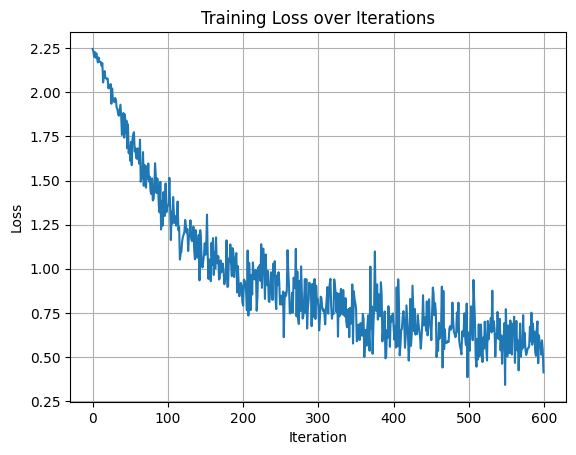

In [ ]:
#loss 그래프 그리기
import matplotlib.pyplot as plt

plt.plot(train_loss_list)
plt.title('Training Loss over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [ ]:

  # 100, 32, 0.05, 50 : 0.694
  # 100, 32, 0.05, 50 : 0.634
  # 100, 32, 0.02, 75 : 0.721
  # 150, 64, 0.03, 50 : 0.820
  ############# new code ##################
  # 160, 64, 0.03, 75 : 0.816
  # 160, 64, 0.03, 75 : 0.792
  # 320, 64, 0.02, 75 : 0.864
  # 1000, 32, 0.02, 50 : 0.843
  # 600, 32, 0.03, 60 : 0.838
  # 400, 64, 0.02, 75 : 0.874

  tries = [[3200, 50, 694],[3200, 50, 634],[3200, 75, 721],[9600, 50, 820],[10240, 75, 816],[10240, 75, 792],[20480, 75, 864],[32000, 50, 843],[19200, 60, 838],[25600, 75, 874]]

회귀식: z = 0.0062 * x1 + 2.0833 * x2 + 572.7784
기울기 ∂z/∂x1 = 0.0062, ∂z/∂x2 = 2.0833


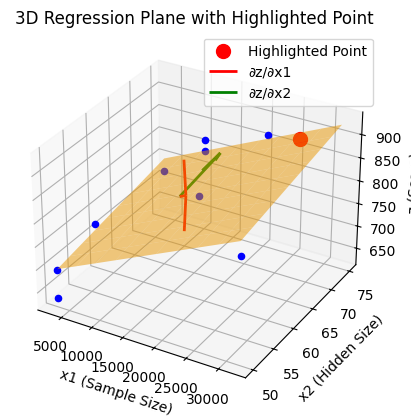

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

# 데이터
tries = np.array([[3200, 50, 694],
                  [3200, 50, 634],
                  [3200, 75, 721],
                  [9600, 50, 820],
                  [10240, 75, 816],
                  [10240, 75, 792],
                  [20480, 75, 864],
                  [32000, 50, 843],
                  [19200, 60, 838],
                  [25600, 75, 874]])

X = tries[:, :2]
y = tries[:, 2]

# 회귀 모델
model = LinearRegression()
model.fit(X, y)

# 회귀 평면 좌표
x_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 10)
y_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 10)
xx, yy = np.meshgrid(x_range, y_range)
zz = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# 회귀 계수
coef_x1, coef_x2 = model.coef_
intercept = model.intercept_

# 시각화
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 일반 점
for i in range(len(tries)):
    if (tries[i] == [25600, 75, 874]).all():
        continue  # 강조 점은 따로 그림
    ax.scatter(tries[i][0], tries[i][1], tries[i][2], color='blue')

# 강조할 점
highlight = np.array([25600, 75, 874])
ax.scatter(highlight[0], highlight[1], highlight[2], color='red', s=100, label='Highlighted Point')

# 회귀 평면
ax.plot_surface(xx, yy, zz, alpha=0.5, color='orange')

# 기울기 벡터 시각화
center_x = np.mean(X[:, 0])
center_y = np.mean(X[:, 1])
center_z = model.predict([[center_x, center_y]])[0]

ax.quiver(center_x, center_y, center_z,
          1000, 0, coef_x1 * 1000,
          color='red', linewidth=2, label='∂z/∂x1')

ax.quiver(center_x, center_y, center_z,
          0, 10, coef_x2 * 10,
          color='green', linewidth=2, label='∂z/∂x2')

# 축 이름
ax.set_xlabel('x1 (Sample Size)')
ax.set_ylabel('x2 (Hidden Size)')
ax.set_zlabel('z (Score)')
plt.title('3D Regression Plane with Highlighted Point')

# 회귀식 출력
print(f"회귀식: z = {coef_x1:.4f} * x1 + {coef_x2:.4f} * x2 + {intercept:.4f}")
print(f"기울기 ∂z/∂x1 = {coef_x1:.4f}, ∂z/∂x2 = {coef_x2:.4f}")

plt.legend()
plt.show()


<ipython-input-13-a30c9a1cb84e>:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap1 = cm.get_cmap('Blues')
<ipython-input-13-a30c9a1cb84e>:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap2 = cm.get_cmap('Greens')


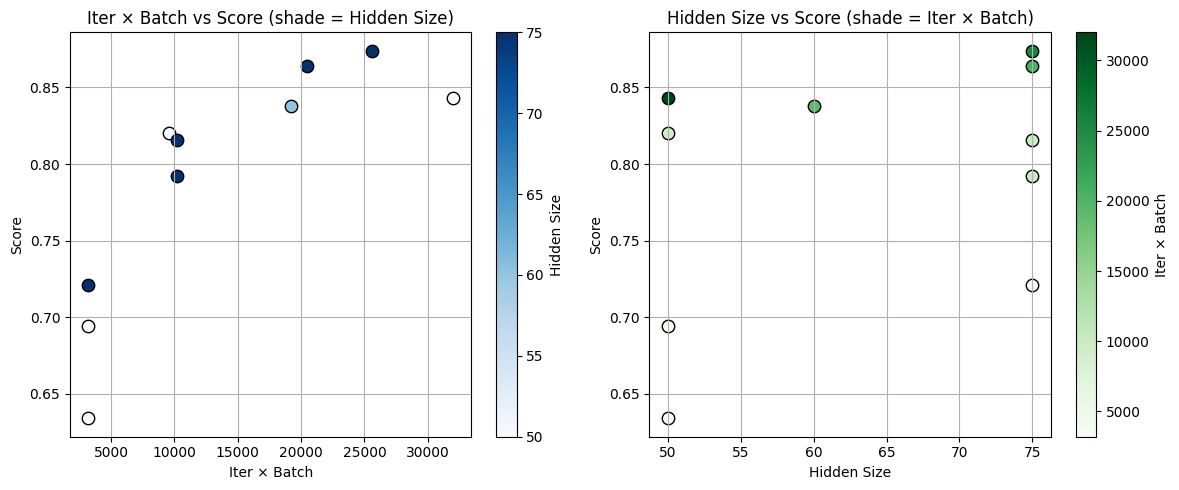

In [13]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# 데이터 정의
data = [
    [100, 32, 0.05, 50, 0.694],
    [100, 32, 0.05, 50, 0.634],
    [100, 32, 0.02, 75, 0.721],
    [150, 64, 0.03, 50, 0.820],
    [160, 64, 0.03, 75, 0.816],
    [160, 64, 0.03, 75, 0.792],
    [320, 64, 0.02, 75, 0.864],
    [1000, 32, 0.02, 50, 0.843],
    [600, 32, 0.03, 60, 0.838],
    [400, 64, 0.02, 75, 0.874]
]

# 변수 분리
epochs      = [d[0] for d in data]
batch_size  = [d[1] for d in data]
hidden_size = [d[3] for d in data]
score       = [d[4] for d in data]
iter_batch  = [e * b for e, b in zip(epochs, batch_size)]

# 정규화 함수
def normalize(arr):
    arr = np.array(arr)
    return (arr - arr.min()) / (arr.max() - arr.min() + 1e-8)

hidden_norm = normalize(hidden_size)
iter_norm = normalize(iter_batch)

# 컬러맵
cmap1 = cm.get_cmap('Blues')
cmap2 = cm.get_cmap('Greens')

# Figure, Axes 객체 명시적으로 생성
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# 첫 번째 subplot: Iter×Batch vs Score, 색은 Hidden Size
for x, y, hn in zip(iter_batch, score, hidden_norm):
    ax1.scatter(x, y, color=cmap1(hn), edgecolor='black', s=80)
ax1.set_xlabel('Iter × Batch')
ax1.set_ylabel('Score')
ax1.set_title('Iter × Batch vs Score (shade = Hidden Size)')
ax1.grid(True)

# Colorbar for Hidden Size
sm1 = cm.ScalarMappable(cmap=cmap1, norm=plt.Normalize(min(hidden_size), max(hidden_size)))
sm1.set_array([])
cbar1 = fig.colorbar(sm1, ax=ax1)
cbar1.set_label('Hidden Size')

# 두 번째 subplot: Hidden Size vs Score, 색은 Iter × Batch
for x, y, itn in zip(hidden_size, score, iter_norm):
    ax2.scatter(x, y, color=cmap2(itn), edgecolor='black', s=80)
ax2.set_xlabel('Hidden Size')
ax2.set_ylabel('Score')
ax2.set_title('Hidden Size vs Score (shade = Iter × Batch)')
ax2.grid(True)

# Colorbar for Iter×Batch
sm2 = cm.ScalarMappable(cmap=cmap2, norm=plt.Normalize(min(iter_batch), max(iter_batch)))
sm2.set_array([])
cbar2 = fig.colorbar(sm2, ax=ax2)
cbar2.set_label('Iter × Batch')

plt.tight_layout()
plt.show()


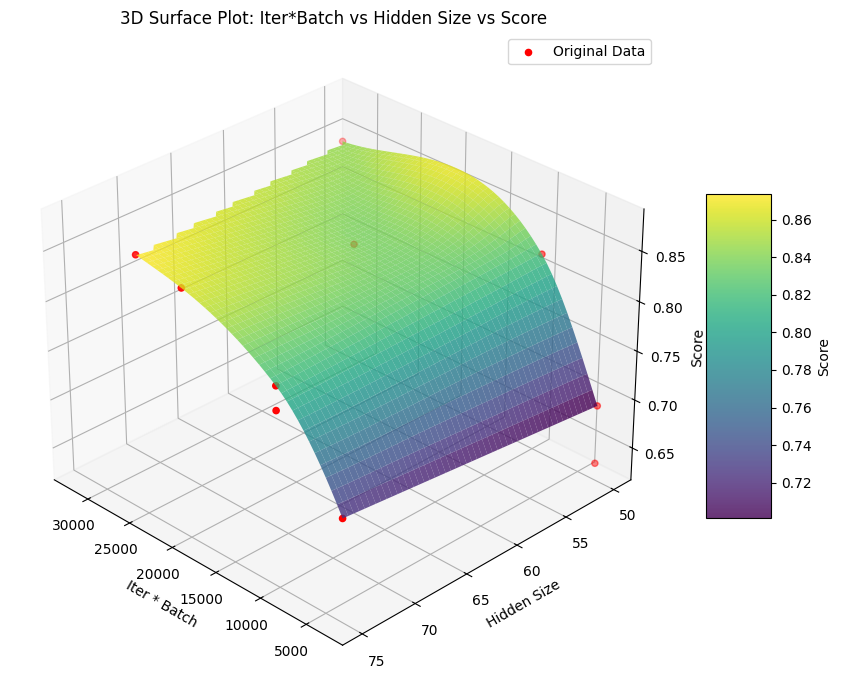

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

# 원본 데이터
data = [
    [100, 32, 0.05, 50, 0.694],
    [100, 32, 0.05, 50, 0.634],
    [100, 32, 0.02, 75, 0.721],
    [150, 64, 0.03, 50, 0.820],
    [160, 64, 0.03, 75, 0.816],
    [160, 64, 0.03, 75, 0.792],
    [320, 64, 0.02, 75, 0.864],
    [1000, 32, 0.02, 50, 0.843],
    [600, 32, 0.03, 60, 0.838],
    [400, 64, 0.02, 75, 0.874]
]

# DataFrame 구성 및 계산
df = pd.DataFrame(data, columns=['Epochs', 'Batch', 'LR', 'Hidden', 'Score'])
df['Iter*Batch'] = df['Epochs'] * df['Batch']

# X, Y, Z 정의
X = df['Iter*Batch'].values
Y = df['Hidden'].values
Z = df['Score'].values

# 그리드 생성 (보간용)
xi = np.linspace(X.min(), X.max(), 50)
yi = np.linspace(Y.min(), Y.max(), 50)
xi, yi = np.meshgrid(xi, yi)

# 보간 (Z값에 대한 griddata)
zi = griddata((X, Y), Z, (xi, yi), method='cubic')

# 3D 플롯
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 표면 그리기
surf = ax.plot_surface(xi, yi, zi, cmap='viridis', alpha=0.8)

# 원래 데이터 점도 표시
ax.scatter(X, Y, Z, color='red', label='Original Data')

ax.view_init(elev=30, azim=135)

# 축 이름
ax.set_xlabel('Iter * Batch')
ax.set_ylabel('Hidden Size')
ax.set_zlabel('Score')
plt.title('3D Surface Plot: Iter*Batch vs Hidden Size vs Score')
fig.colorbar(surf, shrink=0.5, aspect=5, label='Score')

plt.legend()
plt.tight_layout()
plt.show()
